In [1]:
import random
import heapq

# Step 1: Generate synthetic data
def generate_synthetic_data(num_objects, num_rankings):
    """Generates synthetic ranking data."""
    synthetic_data = []
    for _ in range(num_rankings):
        # Generate a list of (object_id, score) pairs with random scores
        ranking = [(obj_id, random.uniform(0.0, 1.0)) for obj_id in range(1, num_objects + 1)]
        # Sort by score in descending order
        ranking.sort(key=lambda x: x[1], reverse=True)
        synthetic_data.append(ranking)
    return synthetic_data

# Generate synthetic data with 1000 objects and 5 rankings
ranked_lists = generate_synthetic_data(num_objects=1000, num_rankings=5)

# Helper functions for sorted and random access
sorted_access = [iter(lst) for lst in ranked_lists]
current_scores = [None] * len(ranked_lists)

def get_next_in_sorted_access():
    """Retrieve the next item from each ranking list in sorted order."""
    for i, it in enumerate(sorted_access):
        current_scores[i] = next(it, None)  # Get next item or None if list is exhausted
    return [score for score in current_scores if score is not None]  # Filter out None values

def random_access(object_id):
    """Retrieve the score for the given object_id from each ranking list."""
    scores = []
    for lst in ranked_lists:
        for obj, score in lst:
            if obj == object_id:
                scores.append(score)
                break
    return scores

# Threshold Algorithm Implementation
def threshold_algorithm(top_k):
    # Store scores for each object seen so far
    object_scores = {}
    threshold = 0

    while True:
        current_scores = get_next_in_sorted_access()

        # Stop if there are no more items in sorted access
        if not current_scores:
            break

        # Update object scores and calculate the threshold
        for obj, score in current_scores:
            if obj not in object_scores:
                object_scores[obj] = random_access(obj)
            object_scores[obj].append(score)  # Append the new score to the object's score list

        # Compute the current threshold as the minimum of the maximum scores seen in each list
        threshold = min([max(scores) for scores in object_scores.values() if scores])

        # Extract the top-k items based on the aggregated scores
        top_k_objects = heapq.nlargest(top_k, object_scores.keys(), key=lambda obj: sum(object_scores[obj]))

        # Check the stopping condition
        if len(top_k_objects) >= top_k and sum(object_scores[top_k_objects[-1]]) >= threshold:
            return top_k_objects

# Run the algorithm on the synthetic dataset
top_k_results = threshold_algorithm(10)  # For example, finding the top 10 items
print("Top-K Results:", top_k_results)


Top-K Results: [415, 251, 742, 364, 13, 519, 427, 621, 986, 452]


In [ ]:
import time
from memory_profiler import memory_usage

# Define ranges for testing
object_sizes = [1000, 5000, 10000]  # Different numbers of objects
ranking_counts = [5, 10, 20]        # Different numbers of rankings
top_k = 10  # Top-k value to find

# Dictionary to store performance results
performance_results = {}

# Loop through each configuration of objects and rankings
for num_objects in object_sizes:
    for num_rankings in ranking_counts:
        # Generate synthetic data
        ranked_lists = generate_synthetic_data(num_objects=num_objects, num_rankings=num_rankings)

        # Measure runtime
        start_time = time.time()
        top_k_results = threshold_algorithm(top_k)
        end_time = time.time()
        runtime = end_time - start_time

        # Measure memory usage
        memory_usage_result = memory_usage((threshold_algorithm, (top_k,)))
        max_memory = max(memory_usage_result)

        # Store the results
        performance_results[(num_objects, num_rankings)] = {
            "Runtime (s)": runtime,
            "Memory (MB)": max_memory
        }

        # Print results for each configuration
        print(f"Configuration: {num_objects} objects, {num_rankings} rankings")
        print(f"Top-K Results: {top_k_results[:5]}...")
        print(f"Runtime: {runtime:.4f} seconds")
        print(f"Memory Usage: {max_memory:.2f} MB\n")

# Print the complete performance summary
print("Performance Summary:")
for config, results in performance_results.items():
    print(f"{config}: Runtime = {results['Runtime (s)']} seconds, Memory = {results['Memory (MB)']} MB")


Configuration: 1000 objects, 5 rankings
Top-K Results: [738, 570, 667, 198, 565]...
Runtime: 0.0024 seconds
Memory Usage: 117.11 MB

Configuration: 1000 objects, 10 rankings
Top-K Results: [899, 84, 784, 159, 382]...
Runtime: 0.0030 seconds
Memory Usage: 117.11 MB

Configuration: 1000 objects, 20 rankings
Top-K Results: [316, 954, 781, 756, 469]...
Runtime: 0.0085 seconds
Memory Usage: 119.02 MB

Configuration: 5000 objects, 5 rankings
Top-K Results: [700, 61, 99, 496, 166]...
Runtime: 0.0431 seconds
Memory Usage: 120.33 MB

Configuration: 5000 objects, 10 rankings
Top-K Results: [512, 914, 999, 148, 106]...
Runtime: 0.0670 seconds
Memory Usage: 124.09 MB

Configuration: 5000 objects, 20 rankings
Top-K Results: [603, 919, 884, 340, 374]...
Runtime: 0.1450 seconds
Memory Usage: 133.19 MB

Configuration: 10000 objects, 5 rankings
Top-K Results: [962, 474, 471, 582, 696]...
Runtime: 0.0577 seconds
Memory Usage: 126.96 MB

Configuration: 10000 objects, 10 rankings
Top-K Results: [747, 986,

In [ ]:
pip install matplotlib

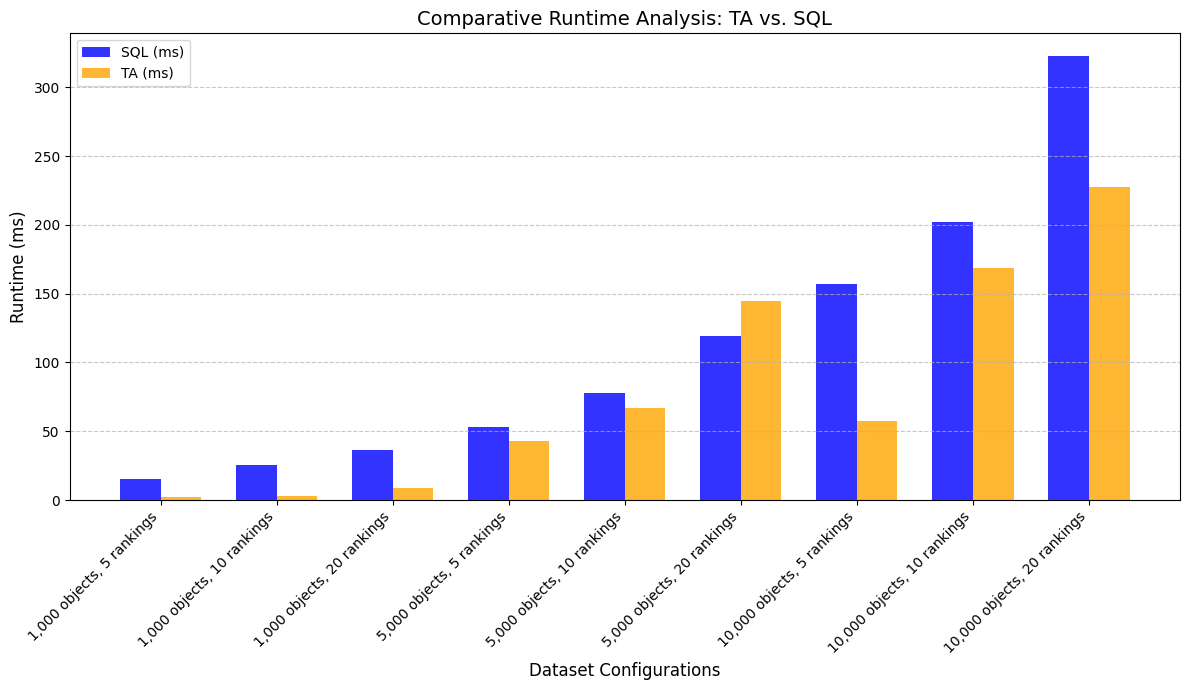

In [ ]:
import matplotlib.pyplot as plt

# Updated dataset configurations
datasets = [
    "1,000 objects, 5 rankings",
    "1,000 objects, 10 rankings",
    "1,000 objects, 20 rankings",
    "5,000 objects, 5 rankings",
    "5,000 objects, 10 rankings",
    "5,000 objects, 20 rankings",
    "10,000 objects, 5 rankings",
    "10,000 objects, 10 rankings",
    "10,000 objects, 20 rankings"
]

# Updated runtime data (SQL in ms, TA in seconds)
sql_runtimes = [15.2, 25.8, 36.5, 52.8, 77.8, 119, 157, 202, 323]
ta_runtimes_seconds = [0.0024, 0.0030, 0.0085, 0.0431, 0.0670, 0.1450, 0.0577, 0.1683, 0.2277]

ta_runtimes_ms = [runtime * 1000 for runtime in ta_runtimes_seconds]

# Create a bar plot for comparison
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
x_positions = range(len(datasets))

# Plot bars for SQL and TA runtimes
ax.bar(x_positions, sql_runtimes, bar_width, label='SQL (ms)', alpha=0.8, color='blue')
ax.bar([x + bar_width for x in x_positions], ta_runtimes_ms, bar_width, label='TA (ms)', alpha=0.8, color='orange')

# Add labels, legend, and grid
ax.set_xlabel("Dataset Configurations", fontsize=12)
ax.set_ylabel("Runtime (ms)", fontsize=12)
ax.set_title("Comparative Runtime Analysis: TA vs. SQL", fontsize=14)
ax.set_xticks([x + bar_width / 2 for x in x_positions])
ax.set_xticklabels(datasets, rotation=45, ha='right', fontsize=10)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()